# [NCTS] 期末專題進度

### 組員：辜宥郡、辜莉婷

# 題目：

### Tensor flow 機器學習 - CNN卷積神經網路暨壓力床墊之圖片辨識

# 做法：

### 利用 Tensorflow 建立 CNN 卷積網路模型，使用壓力感測床墊的壓力分佈圖來進行訓練，而後對新資料進行姿勢辨識。

## Input：壓力床墊輸出的壓力分佈圖

## 目前進度：利用訓練後的測試結果形成混淆矩陣(Confusion Matrix)

# 整體程式架構： 

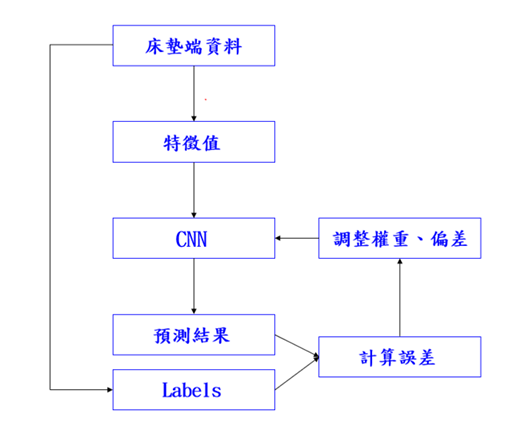

# 姿勢分類：
## 分為五種

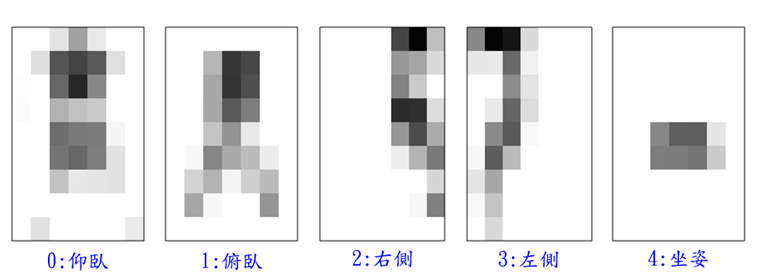 

# 我們 CNN 模型的架構：

包含各有兩層的卷積層及池化層，使用的激活函數為"relu"，最後使用大小為64的全連接層來提高模型的非線性表達能力，再用因為分類數為5，所以大小為5的輸出層，經過softmax函數來輸出辨識結果

# 程式碼開始

# Preprocess Dataframes

In [1]:
import os  # 處理檔案路徑
import glob  #查詢資料夾與文件

#keras 模組
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from keras.utils import np_utils, generic_utils

#載入檔案使用
from PIL import Image
import numpy as np
from six.moves import range
import pandas as pd

#資料前處理
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
import tensorflow as tf
config = tf.ConfigProto(allow_soft_placement=True)

#最多佔gpu資源的70%
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.7)

#按需增加gpu資源
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

In [3]:
all_df = pd.read_excel("C:/NCTS/data/MattressData_database.xlsx")

In [4]:
num=len(all_df)
num

10303

In [5]:
def data_sep(df,prop):
    train_df,test_df=train_test_split(df,train_size=prop,random_state=0) 
    return train_df,test_df

In [6]:
def sep_train_test(df,prop):
    df_label0=df.loc[df['Label']==0]
    train_df_label0,test_df_label0=data_sep(df_label0,prop)
    df_label1=df.loc[df['Label']==1]
    train_df_label1,test_df_label1=data_sep(df_label1,prop)
    df_label2=df.loc[df['Label']==2]
    train_df_label2,test_df_label2=data_sep(df_label2,prop)
    df_label3=df.loc[df['Label']==3]
    train_df_label3,test_df_label3=data_sep(df_label3,prop)
    df_label4=df.loc[df['Label']==4]
    train_df_label4,test_df_label4=data_sep(df_label4,prop)
    train_frames = [train_df_label0, train_df_label1, train_df_label2,train_df_label3,train_df_label4]
    train_df=pd.concat(train_frames)
    test_frames=[test_df_label0,test_df_label1,test_df_label2,test_df_label3,test_df_label4]
    test_df=pd.concat(test_frames)
    return train_df,test_df

In [7]:
train_df,test_df=sep_train_test(all_df,0.8)

C:\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [8]:
def read_to_arr_cnn(raw_df):
    
    imgs=raw_df['檔名']
    imgs=imgs.to_numpy()
    label=raw_df['Label']
    label=label.values
    num = len(imgs)
    data_cnn = np.empty((num,360,210,1),dtype="float32")

    for i in range(num):
            
        img = Image.open("C:/NCTS/data/database/" + imgs[i])
        arr = np.asarray(img, dtype="float32")
        arr.resize((360, 210, 1))
        data_cnn[i, :, :, :] = arr
    
    data_normalize=data_cnn/255
    label_OneHot=np_utils.to_categorical(label)
    
    return data_normalize , label_OneHot

In [9]:
train_features_cnn,train_label_cnn=read_to_arr_cnn(train_df)
test_features_cnn,test_label_cnn=read_to_arr_cnn(test_df)

# Create Model

In [10]:
#CNN model

model_cnn = Sequential()
#卷積層1
model_cnn.add(Conv2D(filters=16,
                 kernel_size=(5,5),
                 padding='same',
                 input_shape=(360,210,1), 
                 activation='relu'))
#池化層1
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
#卷積層2
model_cnn.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 padding='same',
                 activation='relu'))
#池化層2
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Dropout(0.25))
#平坦層
model_cnn.add(Flatten())
#全連接層
model_cnn.add(Dense(64, activation='relu'))
#輸出層
model_cnn.add(Dense(5,activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


# Train Model

In [11]:
#CNN training
model_cnn.compile(loss='categorical_crossentropy',
              optimizer='adam',metrics=['accuracy']) 
train_history_cnn=model_cnn.fit(x=train_features_cnn, 
                        y=train_label_cnn,validation_split=0, 
                        epochs=20, batch_size=16,verbose=2)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
 - 398s - loss: 0.4274 - acc: 0.8579
Epoch 2/20
 - 389s - loss: 0.0490 - acc: 0.9876
Epoch 3/20
 - 388s - loss: 0.0281 - acc: 0.9919
Epoch 4/20
 - 388s - loss: 0.0772 - acc: 0.9784
Epoch 5/20
 - 388s - loss: 0.0110 - acc: 0.9971
Epoch 6/20
 - 388s - loss: 0.0148 - acc: 0.9959
Epoch 7/20
 - 388s - loss: 0.0182 - acc: 0.9943
Epoch 8/20
 - 388s - loss: 0.1723 - acc: 0.9573
Epoch 9/20
 - 388s - loss: 0.0684 - acc: 0.9803
Epoch 10/20
 - 387s - loss: 0.0263 - acc: 0.9917
Epoch 11/20
 - 387s - loss: 0.0098 - acc: 0.9978
Epoch 12/20
 - 387s - loss: 0.0058 - acc: 0.9983
Epoch 13/20
 - 387s - loss: 0.0016 - acc: 0.9998
Epoch 14/20
 - 387s - loss: 3.0177e-04 - acc: 1.0000
Epoch 15/20
 - 387s - loss: 2.0644e-04 - acc: 1.0000
Epoch 16/20
 - 402s - loss: 5.5239e-05 - acc: 1.0000
Epoch 17/20
 - 388s - loss: 2.2558e-04 - acc: 1.0000
Epoch 18/20
 - 388s - loss: 0.1993 - acc: 0.9422
Epoch 19/20
 - 387s - loss: 0.0740 - acc: 0.9761
Epoch 20/20
 -

In [12]:
scores_cnn = model_cnn.evaluate(test_features_cnn,test_label_cnn)
print()
print('accuracy=',scores_cnn[1])

2062/2062 [==============================] - 36s 18ms/step

accuracy= 0.992725509214355


In [13]:
prediction_cnn=model_cnn.predict_classes(test_features_cnn)


df=test_df.drop(['檔名'], axis=1)
test_dfarray = df.values
Label = test_dfarray[:,0]

pd.crosstab(Label,prediction_cnn,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4
label,,,,,
0,335,0,0,0,0
1,0,471,0,0,0
2,1,2,358,1,4
3,1,2,1,377,1
4,0,1,0,1,506
